**Load and explore the dataset**

In [1]:
library(dslabs)
library(tidyverse)
data(gapminder)
gapminder %>% head()
str(gapminder)

Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.3.0     ✔ purrr   0.3.2
✔ tibble  2.1.1     ✔ dplyr   0.8.5
✔ tidyr   0.8.3     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


country,year,infant_mortality,life_expectancy,fertility,population,gdp,continent,region
Albania,1960,115.40,62.87,6.19,1636054,NA,Europe,Southern Europe
Algeria,1960,148.20,47.50,7.65,11124892,13828152297,Africa,Northern Africa
Angola,1960,208.00,35.98,7.32,5270844,NA,Africa,Middle Africa
Antigua and Barbuda,1960,NA,62.97,4.43,54681,NA,Americas,Caribbean
Argentina,1960,59.87,65.39,3.11,20619075,108322326649,Americas,South America
Armenia,1960,NA,66.86,4.55,1867396,NA,Asia,Western Asia


'data.frame':	10545 obs. of  9 variables:
 $ country         : Factor w/ 185 levels "Albania","Algeria",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ year            : int  1960 1960 1960 1960 1960 1960 1960 1960 1960 1960 ...
 $ infant_mortality: num  115.4 148.2 208 NA 59.9 ...
 $ life_expectancy : num  62.9 47.5 36 63 65.4 ...
 $ fertility       : num  6.19 7.65 7.32 4.43 3.11 4.55 4.82 3.45 2.7 5.57 ...
 $ population      : num  1636054 11124892 5270844 54681 20619075 ...
 $ gdp             : num  NA 1.38e+10 NA NA 1.08e+11 ...
 $ continent       : Factor w/ 5 levels "Africa","Americas",..: 4 1 1 2 2 3 2 5 4 3 ...
 $ region          : Factor w/ 22 levels "Australia and New Zealand",..: 19 11 10 2 15 21 2 1 22 21 ...


In [2]:
# Add gdp_cp var i.e. gdp per capita which represents wealth of a country
gapminder <- gapminder %>% mutate(gdp_pc = gdp / population, dollars_per_day = gdp_pc/365)
head(gapminder)

country,year,infant_mortality,life_expectancy,fertility,population,gdp,continent,region,gdp_pc,dollars_per_day
Albania,1960,115.40,62.87,6.19,1636054,NA,Europe,Southern Europe,NA,NA
Algeria,1960,148.20,47.50,7.65,11124892,13828152297,Africa,Northern Africa,1242.992,3.405458
Angola,1960,208.00,35.98,7.32,5270844,NA,Africa,Middle Africa,NA,NA
Antigua and Barbuda,1960,NA,62.97,4.43,54681,NA,Americas,Caribbean,NA,NA
Argentina,1960,59.87,65.39,3.11,20619075,108322326649,Americas,South America,5253.501,14.393153
Armenia,1960,NA,66.86,4.55,1867396,NA,Asia,Western Asia,NA,NA


**Compare infant mortality in Sri Lanka and Turkey in 2015**

In [46]:
mortality <- gapminder %>%
    filter(year == 2015 & country %in% c("Sri Lanka", "Turkey")) %>%
    select(country, infant_mortality)
mortality <- cbind(mortality[1,], mortality[2,])
mortality <- mortality[-2,]

mortality1 <- gapminder %>%
    filter(year == 2015 & country %in% c("Poland","South Korea")) %>%
    select(country, infant_mortality)
mortality1 <- cbind(mortality1[1,], mortality1[2,])
mortality1 <- mortality1[-2,]

mortality2 <- gapminder %>%
    filter(year == 2015 & country %in% c("Malaysia","Russia")) %>%
    select(country, infant_mortality)
mortality2 <- cbind(mortality2[1,], mortality2[2,])
mortality2 <- mortality2[-2,]

mortality3 <- gapminder %>%
    filter(year == 2015 & country %in% c("Pakistan","Vietnam")) %>%
    select(country, infant_mortality)
mortality3 <- cbind(mortality3[1,], mortality3[2,])
mortality3 <- mortality3[-2,]

mortality4 <- gapminder %>%
    filter(year == 2015 & country %in% c("Thailand","South Africa")) %>%
    select(country, infant_mortality)
mortality4 <- cbind(mortality4[1,], mortality4[2,])
mortality4 <- mortality4[-2,]
rbind.data.frame(mortality,mortality1,mortality2,mortality3,mortality4)

country,infant_mortality,country,infant_mortality
Sri Lanka,8.4,Turkey,11.6
South Korea,2.9,Poland,4.5
Malaysia,6.0,Russia,8.2
Pakistan,65.8,Vietnam,17.3
South Africa,33.6,Thailand,10.5


In [64]:
countries <- c("Sri Lanka","Turkey","Poland","South Korea","Malaysia","Russia","Pakistan","Vietnam","Thailand","South Africa")
mortality <- data.frame()
for (i in seq(1,10,2)) {
    mortality1 <- gapminder %>%
        filter(year == 2015 & country %in% countries[c(i,i+1)]) %>%
        select(country, infant_mortality)
    mortality1 <- cbind(mortality1[1,], mortality1[2,])
    mortality1 <- mortality1[-2,]
    mortality <- rbind.data.frame(mortality,mortality1)
}
mortality

country,infant_mortality,country,infant_mortality
Sri Lanka,8.4,Turkey,11.6
South Korea,2.9,Poland,4.5
Malaysia,6.0,Russia,8.2
Pakistan,65.8,Vietnam,17.3
South Africa,33.6,Thailand,10.5


country,infant_mortality,country,infant_mortality
Sri Lanka,8.4,Turkey,11.6
South Korea,2.9,Poland,4.5
Malaysia,6.0,Russia,8.2
Pakistan,65.8,Vietnam,17.3
South Africa,33.6,Thailand,10.5


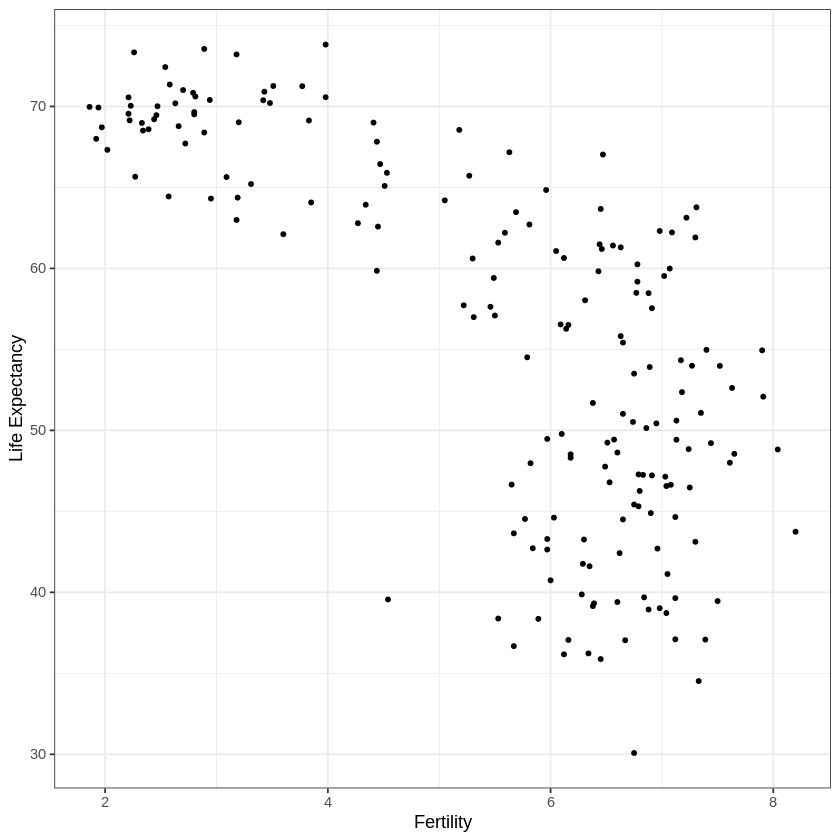

In [4]:
#basic scatterplot of life expectancy versus fertility in year 1962
ds_theme_set()
gapminder %>%
    filter(year == 1962) %>%
    ggplot(aes(fertility, life_expectancy)) +
    geom_point(size = 1) +
    ylab("Life Expectancy") +
    xlab("Fertility")

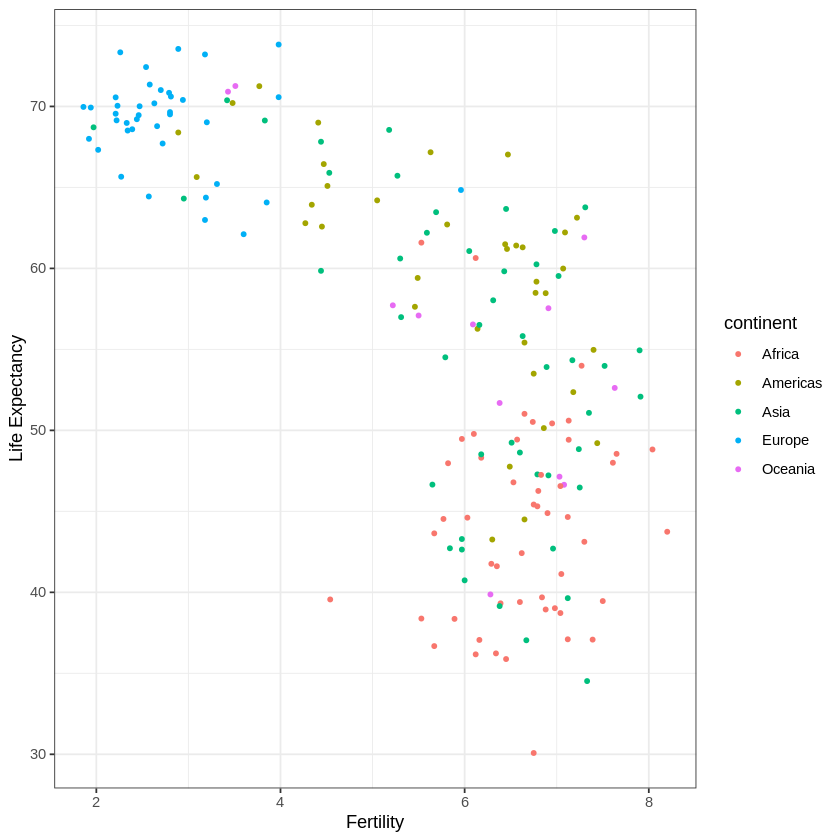

In [5]:
# Add color based on continent
gapminder %>%
    filter(year == 1962) %>%
    ggplot(aes(fertility, life_expectancy, col = continent)) +
    geom_point(size = 1) +
    ylab("Life Expectancy") +
    xlab("Fertility")

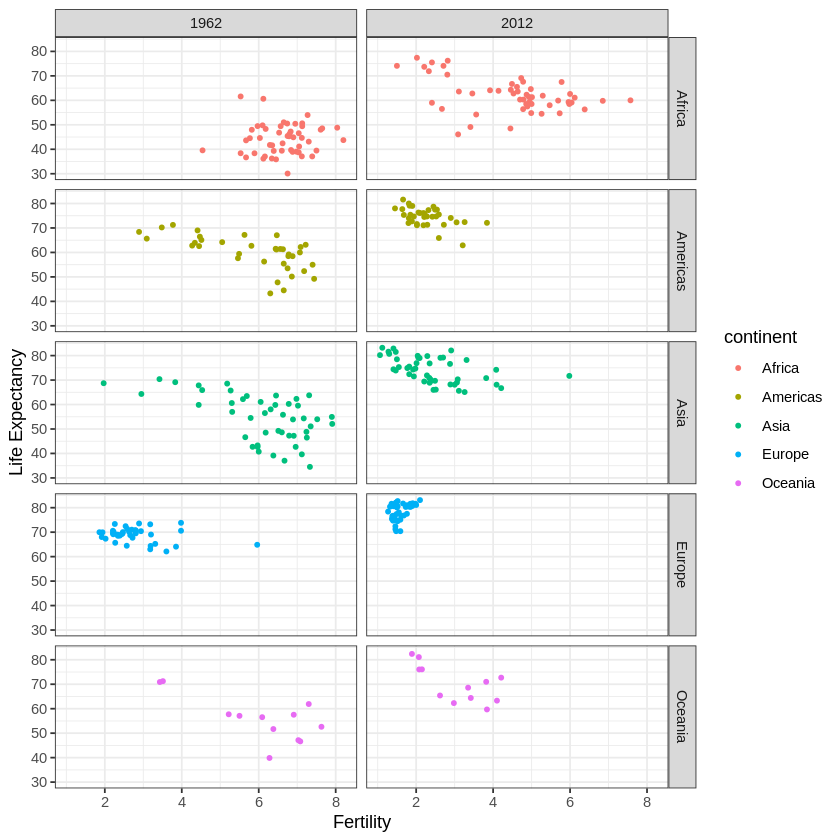

In [6]:
# Facet by continent and year
gapminder %>% filter(year %in% c("1962", "2012")) %>%
    ggplot(aes(fertility, life_expectancy, col = continent)) +
    geom_point(size = 1) +
    facet_grid(continent ~ year) +
    ylab("Life Expectancy") +
    xlab("Fertility")

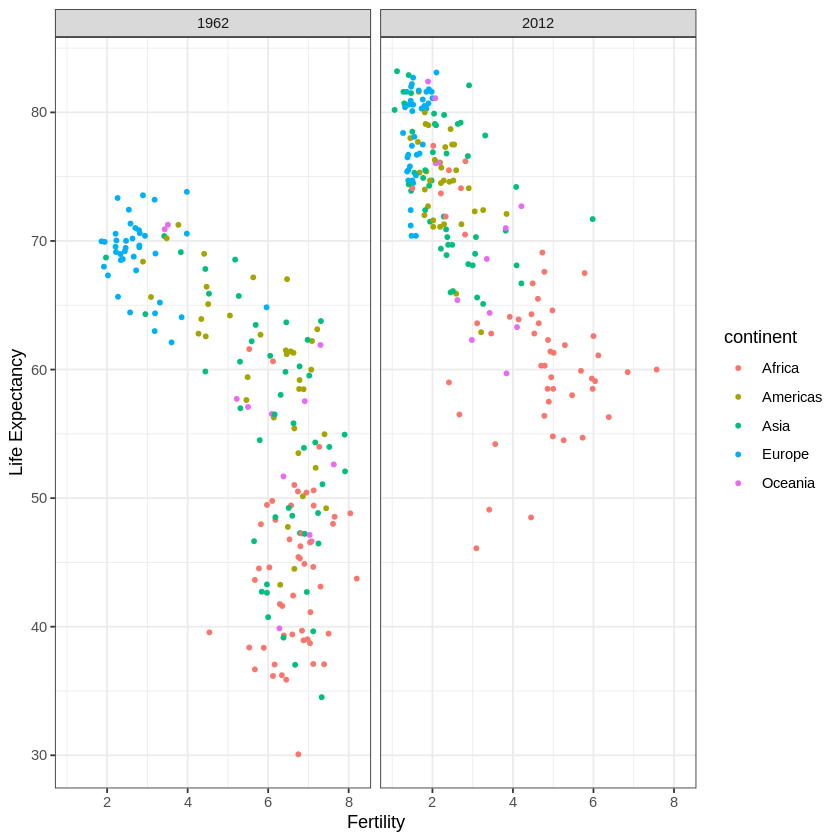

In [7]:
# Facet by year only
gapminder %>% filter(year %in% c("1962", "2012")) %>%
    ggplot(aes(fertility, life_expectancy, col = continent)) +
    geom_point(size = 1) +
    facet_grid(.~ year) +
    ylab("Life Expectancy") +
    xlab("Fertility")

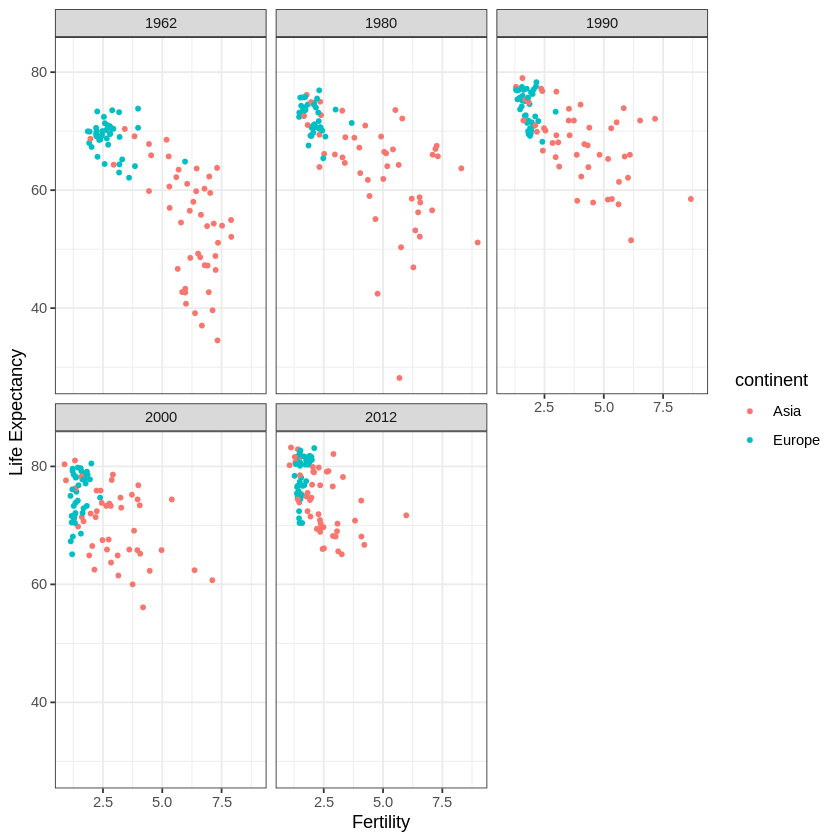

In [8]:
# facet by year, plots wrapped onto multiple rows
y <- c("1962", "1980", "1990", "2000", "2012")
c <- c("Europe", "Asia")
gapminder %>% filter(year %in% y & continent %in% c) %>%
    ggplot(aes(fertility, life_expectancy, col = continent)) +
    geom_point(size = 1) +
    facet_wrap(~year) +
    ylab("Life Expectancy") +
    xlab("Fertility")

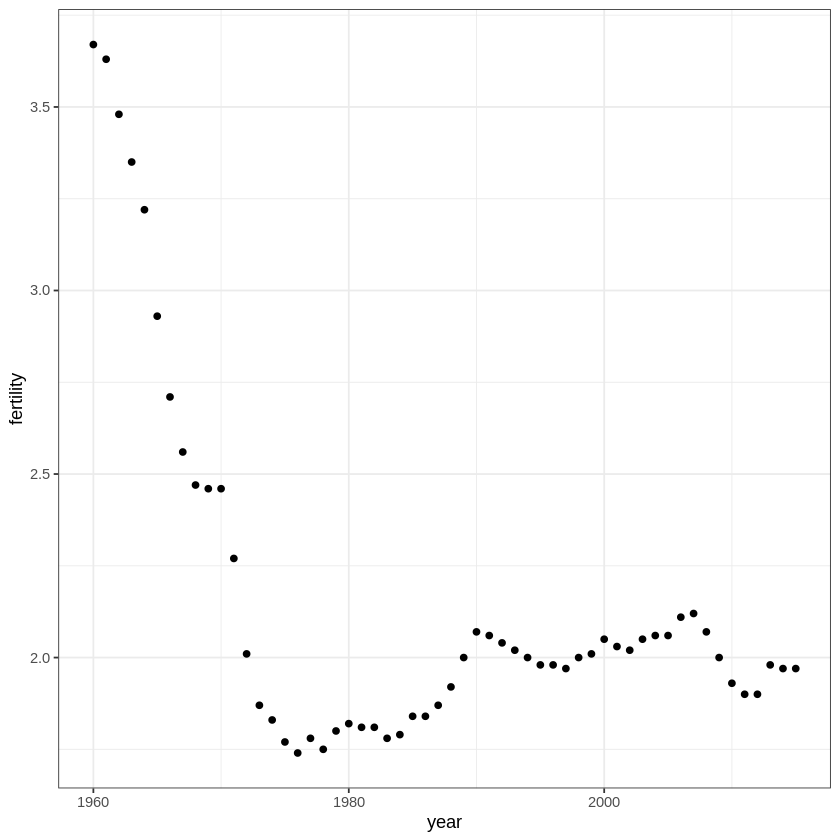

In [9]:
# scatterplot of US fertility by year
gapminder %>%
    filter(country == "United States", !is.na(fertility)) %>%
    ggplot(aes(year, fertility)) +
    geom_point()

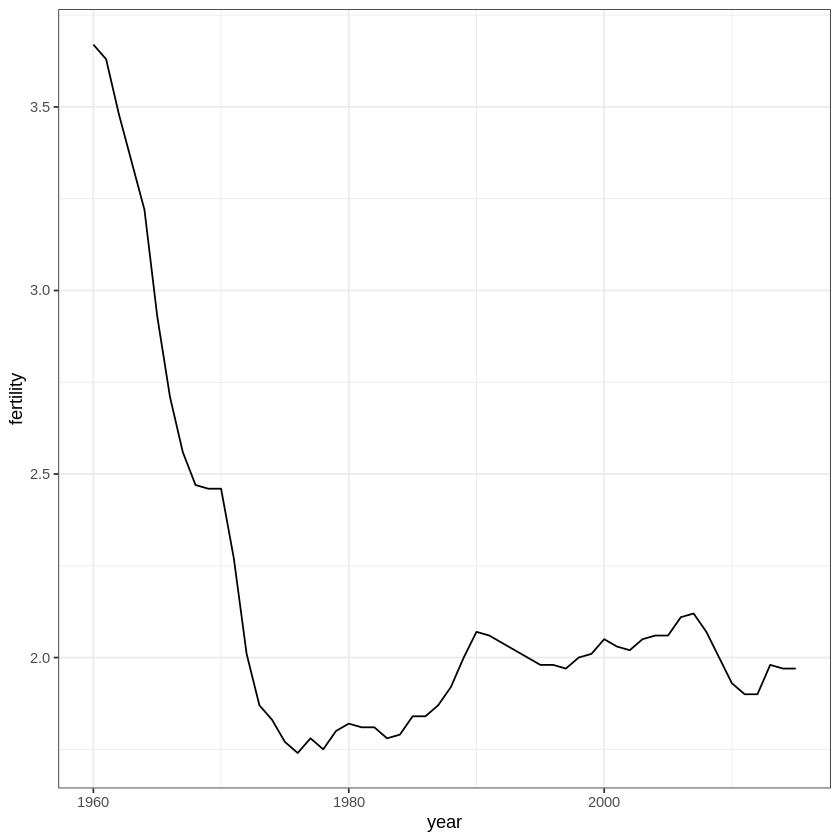

In [10]:
# line plot of US fertility by year
gapminder %>%
    filter(country == "United States", !is.na(fertility)) %>%
    ggplot(aes(year, fertility)) +
    geom_line()

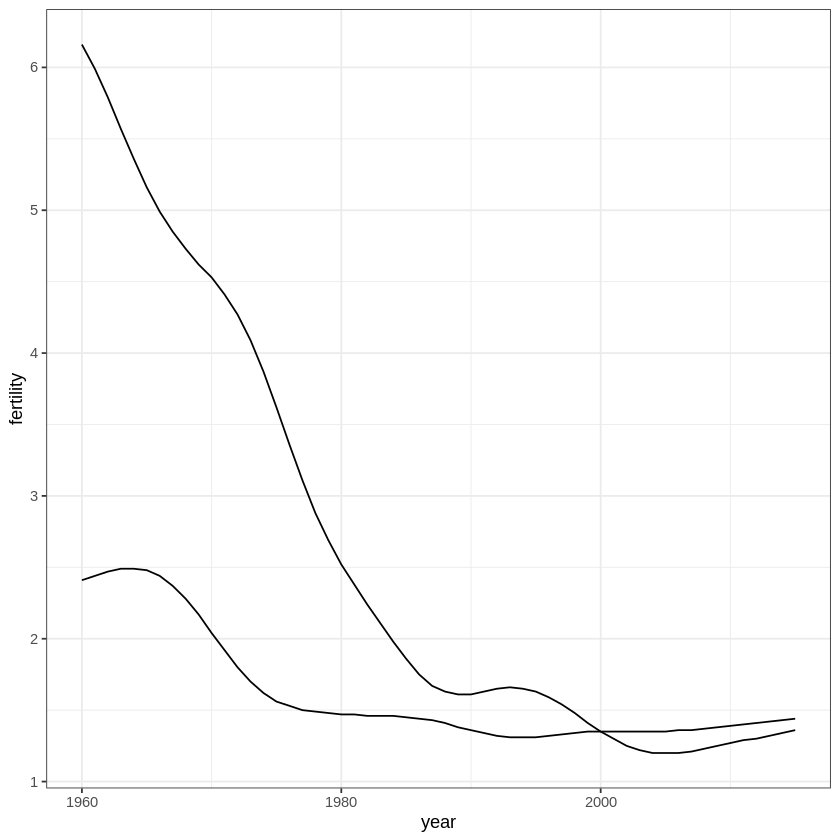

In [11]:
countries <- c("South Korea", "Germany")
gapminder %>% filter(country %in% countries & !is.na(fertility)) %>%
    ggplot(aes(year, fertility, group = country)) +
    geom_line()

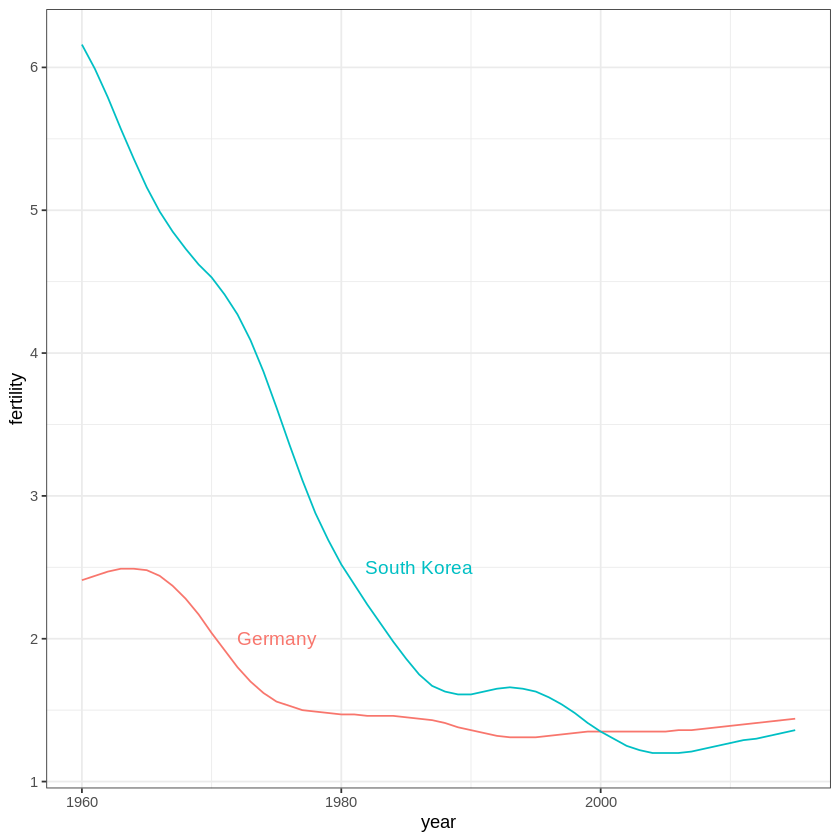

In [12]:
labels <- data.frame(country = countries, x = c(1986, 1975), y = c(2.5,2.0))
gapminder %>% filter(country %in% countries & !is.na(fertility)) %>%
    ggplot(aes(year, fertility, col = country)) +
    geom_text(data = labels, aes(x, y, label = country), size = 4) +
    theme(legend.position = "none") +
    geom_line()

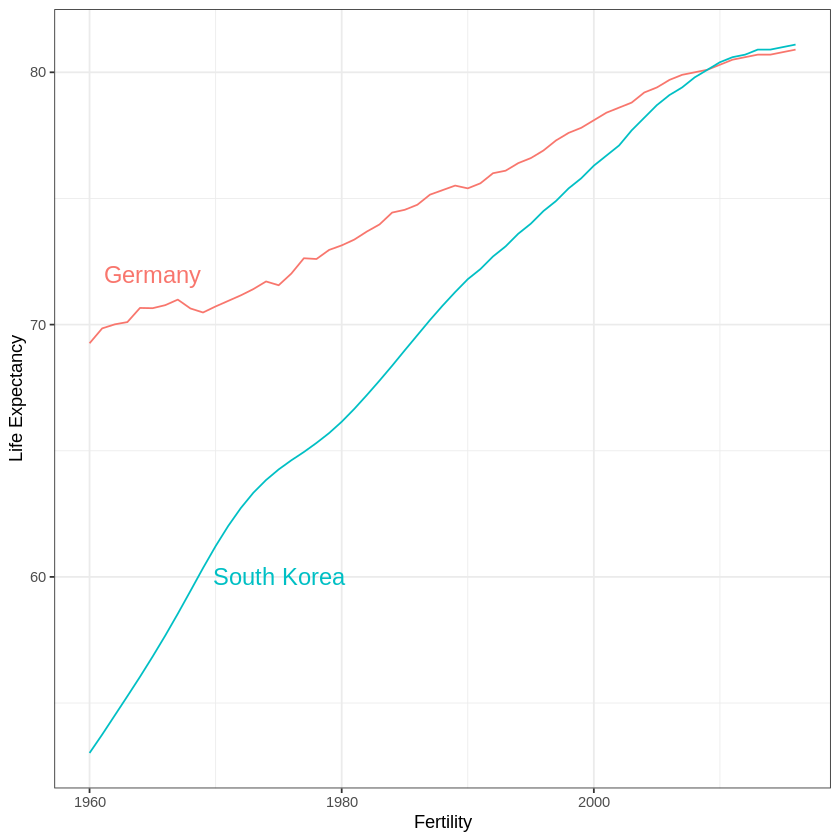

In [13]:
# life expectancy time series - lines colored by country and labeled, no legend
labels <- data.frame(country = countries, x = c(1975, 1965), y = c(60, 72))
gapminder %>% filter(country %in% countries) %>%
    ggplot(aes(year, life_expectancy, col = country)) +
    geom_line() +
    geom_text(data = labels, aes(x, y, label = country), size = 5) +
    theme(legend.position = "none") +
    ylab("Life Expectancy") +
    xlab("Fertility")

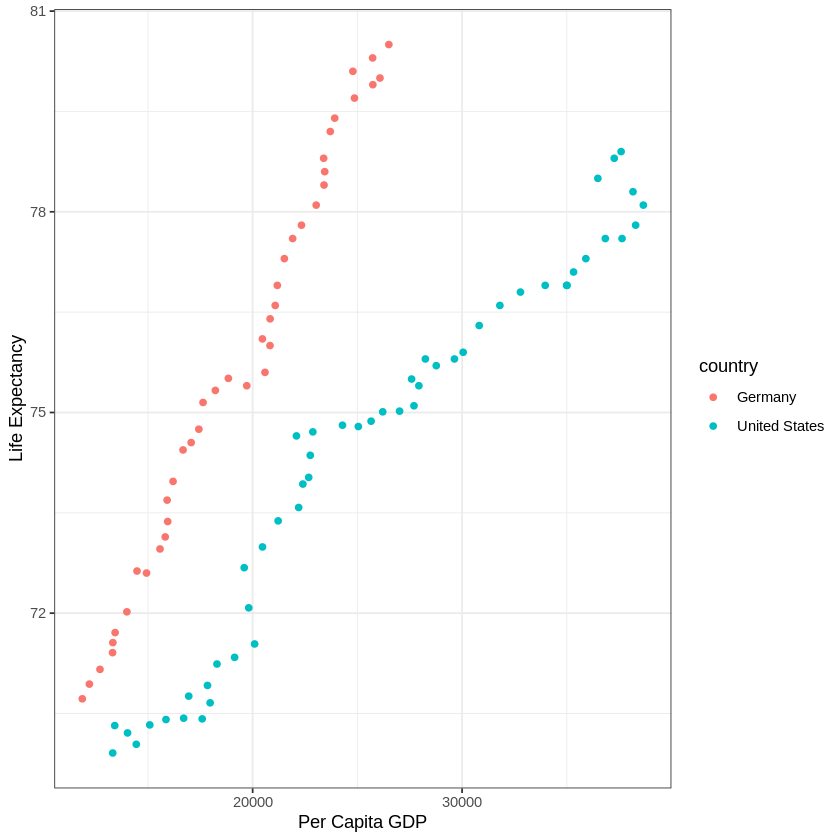

In [14]:
countries <- c("Germany", "United States")
gapminder %>%
    filter(country %in% countries & !is.na(gdp_pc)) %>%
    ggplot(aes(gdp_pc, life_expectancy, col = country)) +
    geom_point() +
    xlab("Per Capita GDP") +
    ylab("Life Expectancy")

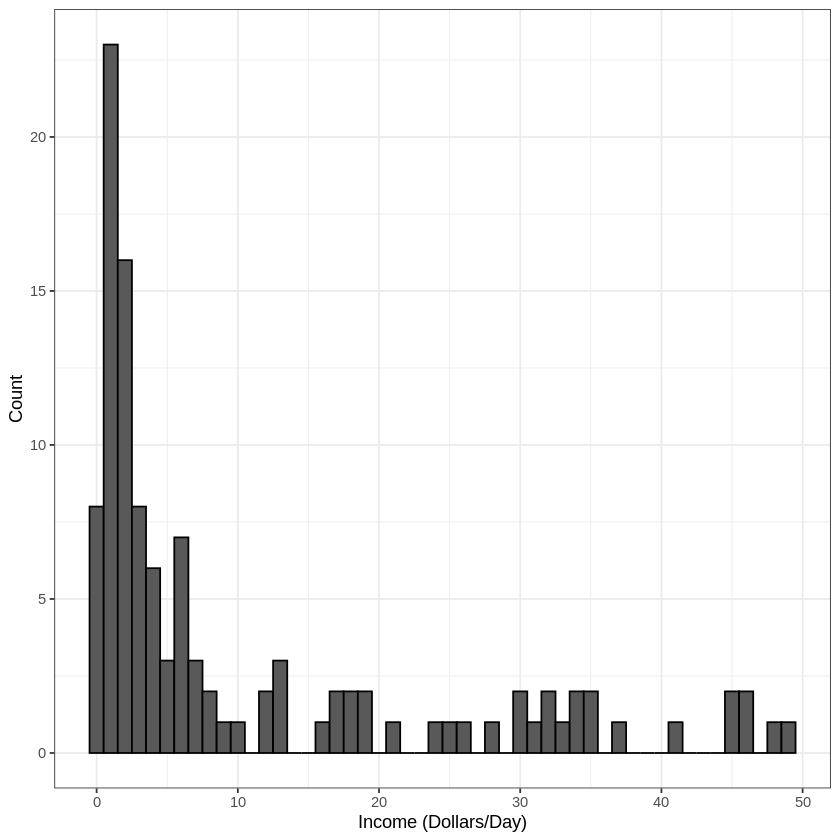

In [15]:
past_year <- 1970
gapminder %>%
    filter(year == past_year & !is.na(gdp)) %>%
    ggplot(aes(dollars_per_day)) +
    geom_histogram(binwidth = 1, col = "black") +
    xlab("Income (Dollars/Day)") +
    ylab("Count")

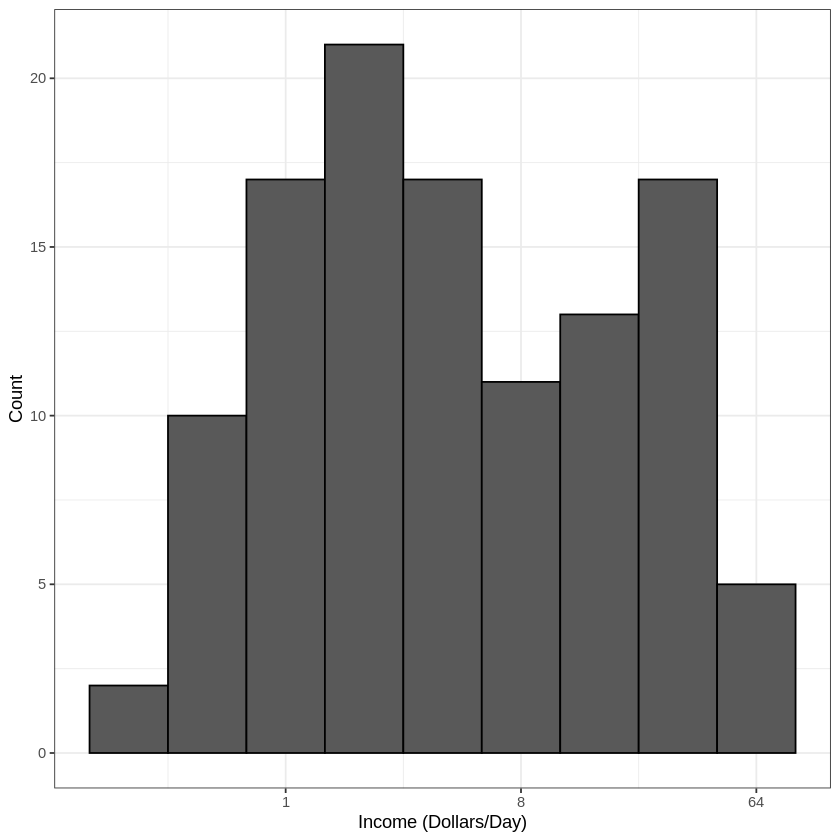

In [16]:
past_year <- 1970
gapminder %>%
    filter(year == past_year & !is.na(gdp)) %>%
    ggplot(aes(dollars_per_day)) +
    geom_histogram(binwidth = 1, color = "black") +
    scale_x_continuous(trans = "log2") +
    xlab("Income (Dollars/Day)") +
    ylab("Count")

[1] 22

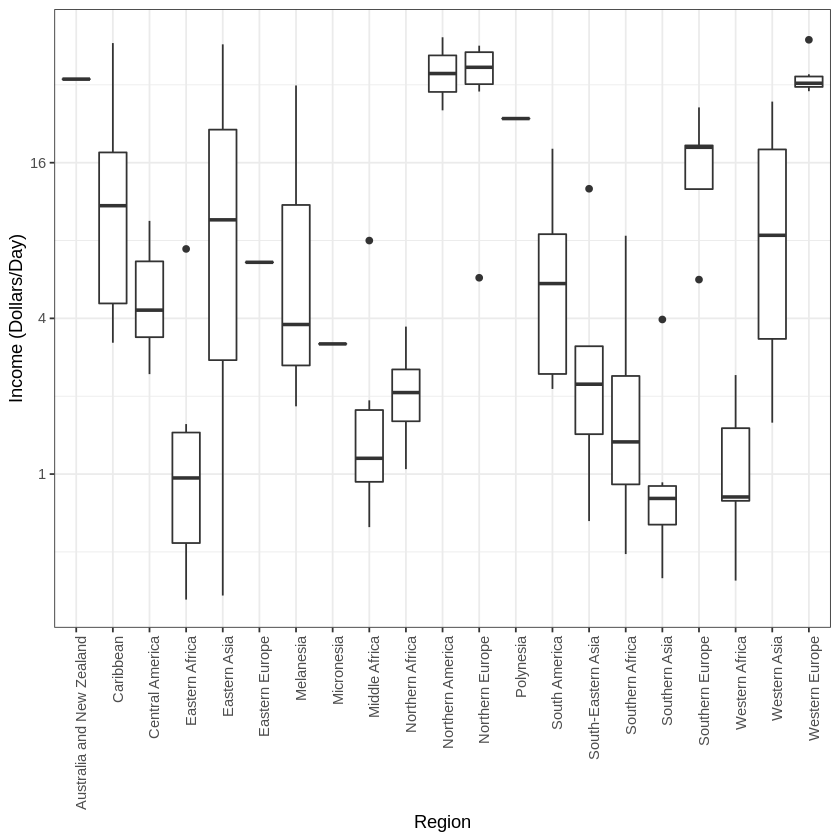

In [17]:
# Add dollars_per_day or Income per day Variable/Column to the data
gapminder <- gapminder %>% mutate(dollars_per_day = gdp/population/365)

# Number of regions 
length(levels(gapminder$region))

# Plot Boxplot
gapminder %>%
    filter(year == past_year & !is.na(gdp)) %>%
    ggplot(aes(region, dollars_per_day)) +
    geom_boxplot() +
    scale_y_continuous(trans = "log2") +
    theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
    ylab("Income (Dollars/Day)") +
    xlab("Region")

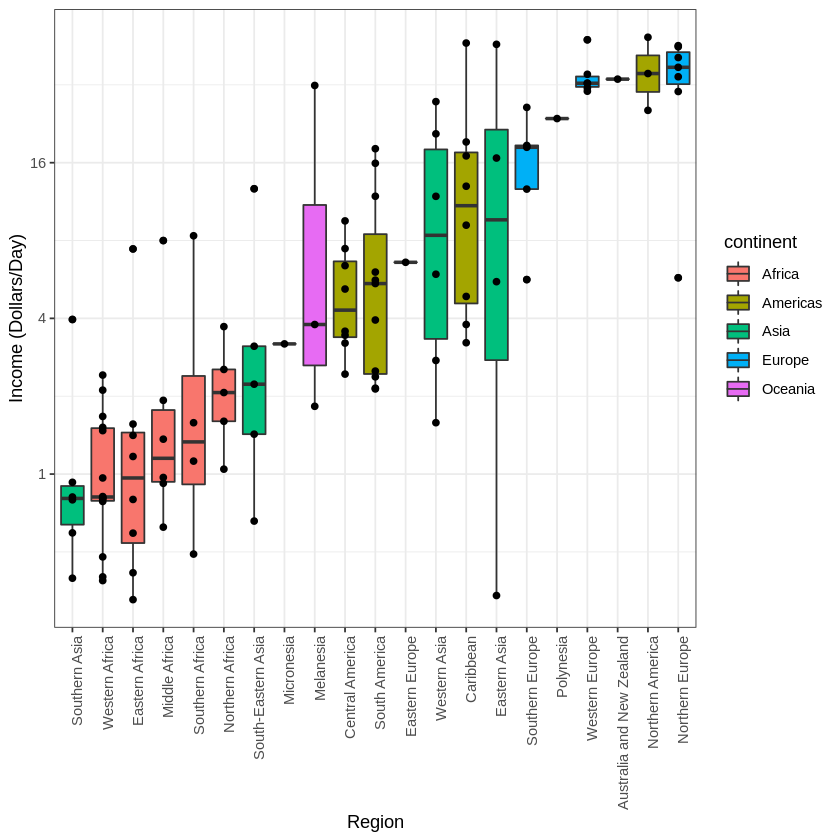

In [18]:
# Reorder and Color Regions for better comparison
gapminder %>%
    filter(year == past_year & !is.na(gdp)) %>%
    # Reorder region by median income
    mutate(region = reorder(region, dollars_per_day, FUN = median)) %>%
    ggplot(aes(region, dollars_per_day, fill = continent)) +
    geom_boxplot() +
    scale_y_continuous(trans = "log2") +
    theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
    geom_point(show.legend = FALSE) +
    ylab("Income (Dollars/Day)") +
    xlab("Region")

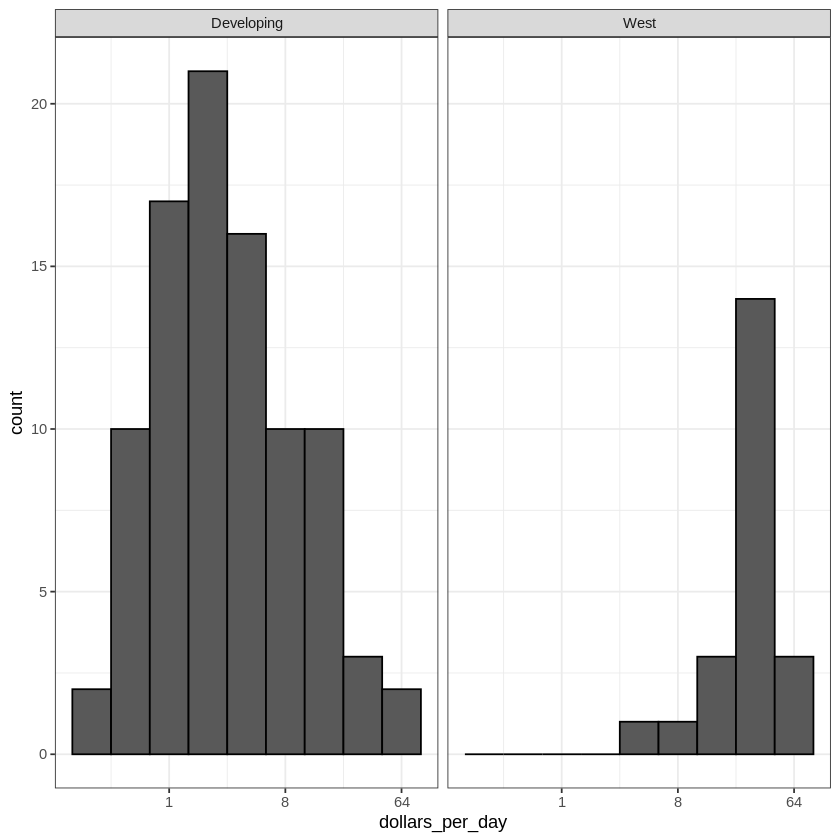

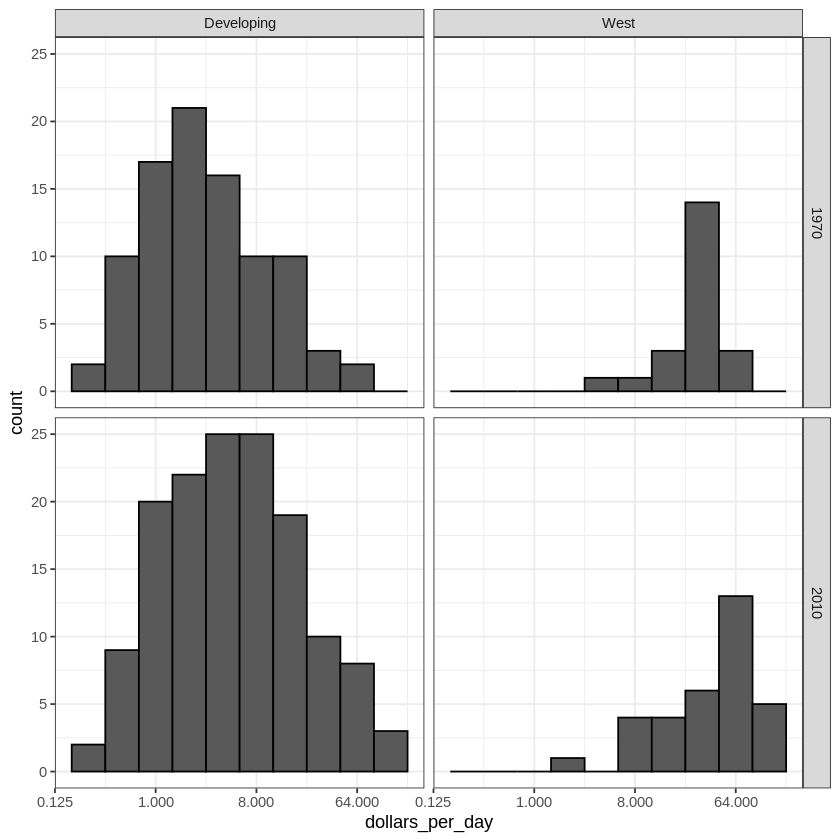

In [19]:
# add dollars per day variable and define past year
gapminder <- gapminder %>%
    mutate(dollars_per_day = gdp/population/365)
past_year <- 1970

# define Western countries
west <- c("Western Europe", "Northern Europe", "Southern Europe", "Northern America", "Australia and New Zealand")

# facet by West vs devloping
gapminder %>%
    filter(year == past_year & !is.na(gdp)) %>%
    mutate(group = ifelse(region %in% west, "West", "Developing")) %>%
    ggplot(aes(dollars_per_day)) +
    geom_histogram(binwidth = 1, color = "black") +
    scale_x_continuous(trans = "log2") +
    facet_grid(. ~ group)

# facet by West/developing and year
present_year <- 2010
gapminder %>%
    filter(year %in% c(past_year, present_year) & !is.na(gdp)) %>%
    mutate(group = ifelse(region %in% west, "West", "Developing")) %>%
    ggplot(aes(dollars_per_day)) +
    geom_histogram(binwidth = 1, color = "black") +
    scale_x_continuous(trans = "log2") +
    facet_grid(year ~ group)

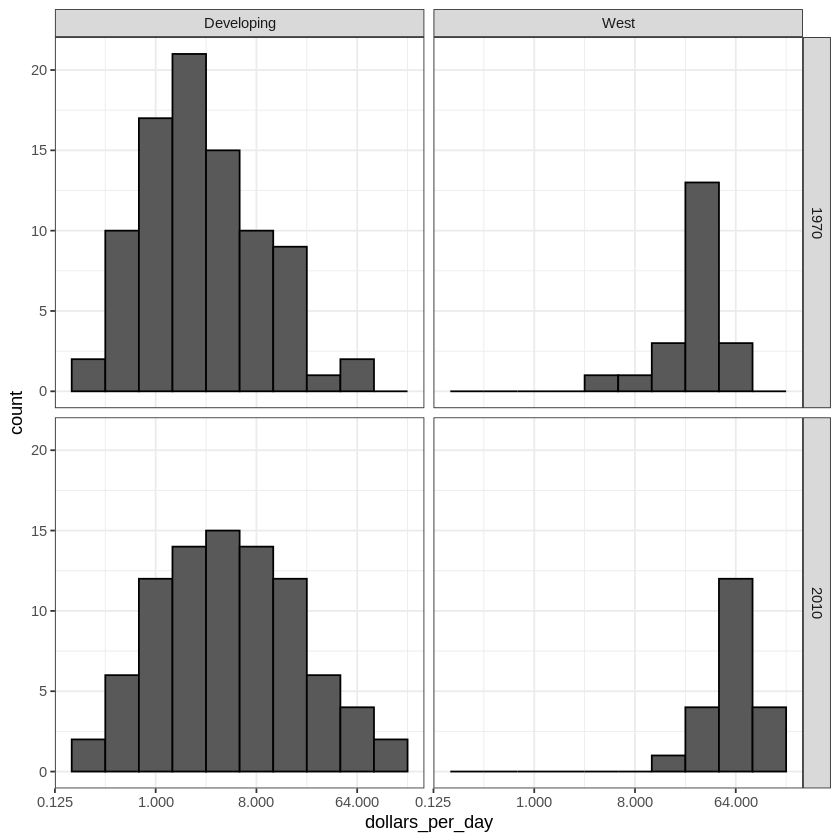

In [20]:
# define countries that have data available in both years
country_list_1 <- gapminder %>%
    filter(year == past_year & !is.na(dollars_per_day)) %>% .$country
    country_list_2 <- gapminder %>%
    filter(year == present_year & !is.na(dollars_per_day)) %>% .$country
    country_list <- intersect(country_list_1, country_list_2)

# make histogram including only countries with data available in both years
gapminder %>%
    filter(year %in% c(past_year, present_year) & country %in% country_list) %>%    # keep only selected countries
    mutate(group = ifelse(region %in% west, "West", "Developing")) %>%
    ggplot(aes(dollars_per_day)) +
    geom_histogram(binwidth = 1, color = "black") +
    scale_x_continuous(trans = "log2") +
    facet_grid(year ~ group)

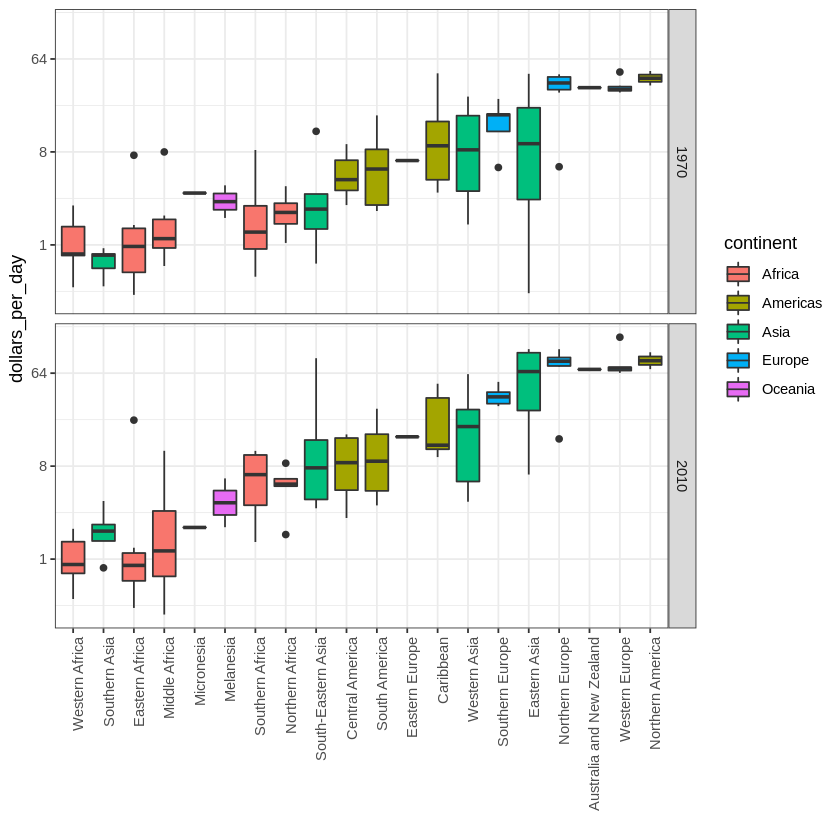

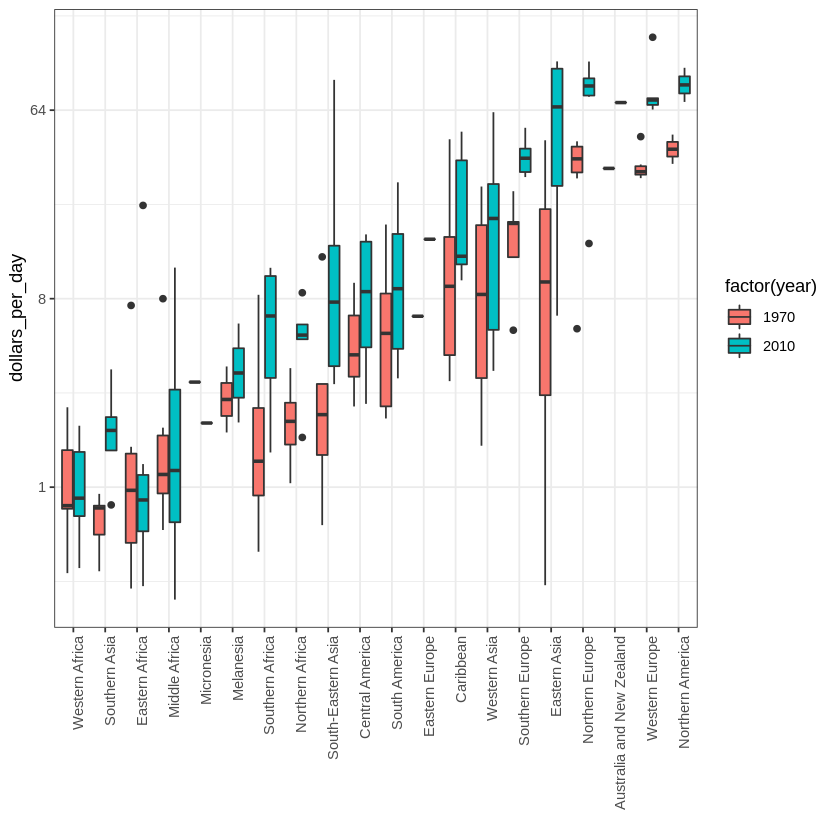

In [21]:
p <- gapminder %>%
    filter(year %in% c(past_year, present_year) & country %in% country_list) %>%
    mutate(region = reorder(region, dollars_per_day, FUN = median)) %>%
    ggplot() +
    theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
    xlab("") + scale_y_continuous(trans = "log2")
    
 p + geom_boxplot(aes(region, dollars_per_day, fill = continent)) +
     facet_grid(year ~ .)
 
 # arrange matching boxplots next to each other, colored by year
 p + geom_boxplot(aes(region, dollars_per_day, fill = factor(year)))



|group      |  n|
|:----------|--:|
|Developing | 87|
|West       | 21|

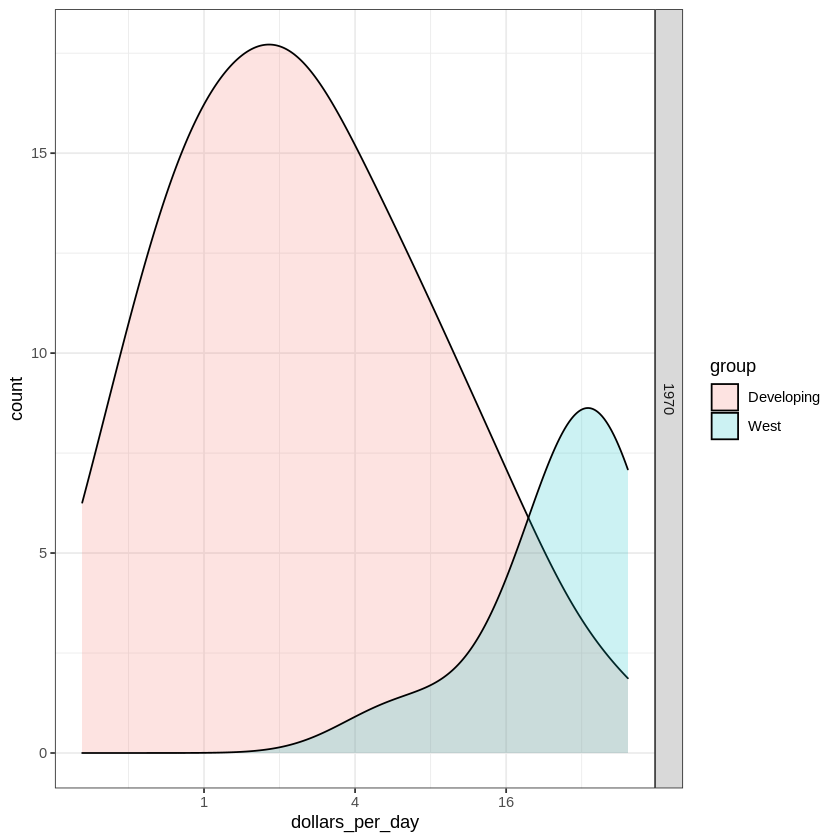

In [22]:
# see the code below the previous video for variable definitions

# smooth density plots - area under each curve adds to 1
gapminder %>%
    filter(year == past_year & country %in% country_list) %>%
    mutate(group = ifelse(region %in% west, "West", "Developing")) %>% group_by(group) %>%
    summarize(n = n()) %>% knitr::kable()

# smooth density plots - variable counts on y-axis
p <- gapminder %>%
    filter(year == past_year & country %in% country_list) %>%
    mutate(group = ifelse(region %in% west, "West", "Developing")) %>%
    ggplot(aes(dollars_per_day, y = ..count.., fill = group)) +
    scale_x_continuous(trans = "log2")
p + geom_density(alpha = 0.2, bw = 0.75) + facet_grid(year ~ .)


In [23]:
# add group as a factor, grouping regions
gapminder <- gapminder %>%
    mutate(group = case_when(
            .$region %in% west ~ "West",
            .$region %in% c("Eastern Asia", "South-Eastern Asia") ~ "East Asia",
            .$region %in% c("Caribbean", "Central America", "South America") ~ "Latin America",
            .$continent == "Africa" & .$region != "Northern Africa" ~ "Sub-Saharan Africa",
            TRUE ~ "Others"))

# reorder factor levels
gapminder <- gapminder %>%
    mutate(group = factor(group, levels = c("Others", "Latin America", "East Asia", "Sub-Saharan Africa", "West")))


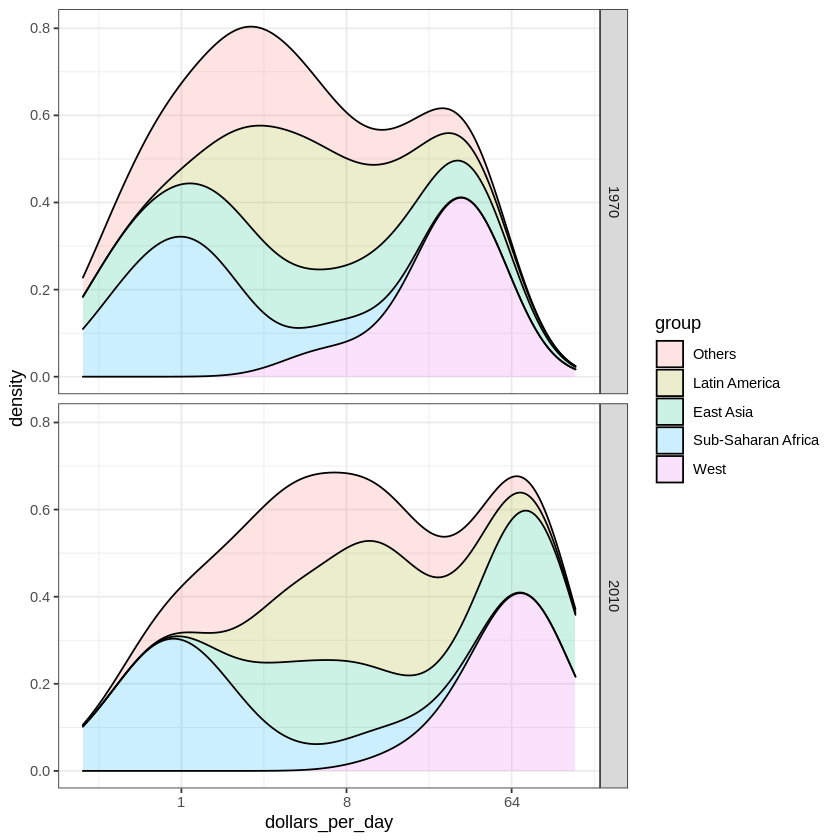

In [24]:
# note you must redefine p with the new gapminder object first
p <- gapminder %>%
  filter(year %in% c(past_year, present_year) & country %in% country_list) %>%
    ggplot(aes(dollars_per_day, fill = group)) +
    scale_x_continuous(trans = "log2")

# stacked density plot
p + geom_density(alpha = 0.2, bw = 0.75, position = "stack") +
    facet_grid(year ~ .)

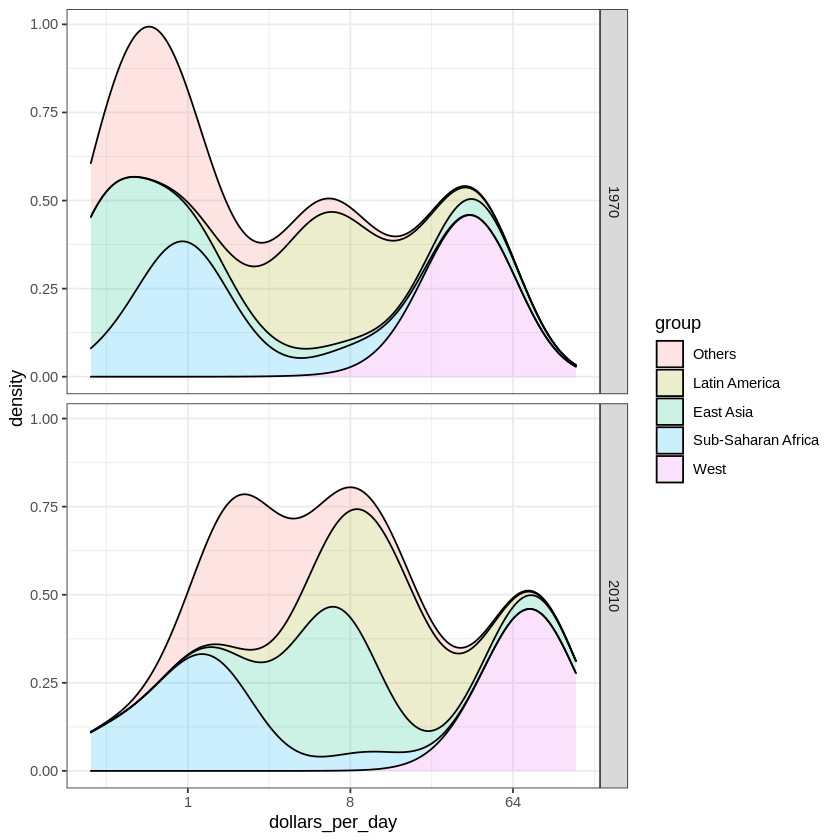

In [25]:
# weighted stacked density plot
gapminder %>%
    filter(year %in% c(past_year, present_year) & country %in% country_list) %>%
    group_by(year) %>%
    mutate(weight = population/sum(population*2)) %>%
    ungroup() %>%
    ggplot(aes(dollars_per_day, fill = group, weight = weight)) +
    scale_x_continuous(trans = "log2") +
    geom_density(alpha = 0.2, bw = 0.75, position = "stack") + facet_grid(year ~ .)